In [38]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.transforms as transforms

In [39]:
# Note to self: CSV - failing dtype, wont plot or change to int using .astype(int)
df = pd.read_csv("./data/seklima/wyssen_undr/310318_100418.csv")

In [40]:
df = df.drop(df.index[-1])
df

,name,station,id,sum(precipitation_amount PT1H),air_temperature,max(wind_speed PT1H),max_wind_speed(wind_from_direction PT1H),time (Norwegian Mean time)
0,Filefjell - Kyrkjestølane,SN54710,0.0,0,"-24,4","1,1",83.0,30.03.2018 23:00
1,Filefjell - Kyrkjestølane,SN54710,1.0,0,"-24,9","1,3",105.0,31.03.2018 00:00
2,Filefjell - Kyrkjestølane,SN54710,2.0,0,"-25,7","1,6",101.0,31.03.2018 01:00
3,Filefjell - Kyrkjestølane,SN54710,3.0,0,"-25,1","0,8",120.0,31.03.2018 02:00
4,Filefjell - Kyrkjestølane,SN54710,4.0,0,"-24,4","1,3",86.0,31.03.2018 03:00
...,...,...,...,...,...,...,...,...
235,Filefjell - Kyrkjestølane,SN54710,235.0,"0,1","-1,6","7,7",71.0,09.04.2018 18:00
236,Filefjell - Kyrkjestølane,SN54710,236.0,"0,1","-1,9","6,9",76.0,09.04.2018 19:00
237,Filefjell - Kyrkjestølane,SN54710,237.0,0,-2,"6,1",81.0,09.04.2018 20:00
238,Filefjell - Kyrkjestølane,SN54710,238.0,0,"-2,2","6,3",81.0,09.04.2018 21:00


In [41]:
# Change symbols so table is in correct format for further analysis. Change all ',' to '.' for numbers etc.

df['air_temperature'] = (df['air_temperature'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['max(wind_speed PT1H)'] = (df['max(wind_speed PT1H)'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['max_wind_speed(wind_from_direction PT1H)'] = (df['max_wind_speed(wind_from_direction PT1H)'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['sum(precipitation_amount PT1H)'] = (df['sum(precipitation_amount PT1H)'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['time (Norwegian Mean time)'] = df['time (Norwegian Mean time)'].replace('.','-')

temp = df['air_temperature']
wind = df['max(wind_speed PT1H)']
wind_dir = df['max_wind_speed(wind_from_direction PT1H)']
precipitation = df['sum(precipitation_amount PT1H)']

In [42]:
# Format = %d-%m-%Y %H:%M:%S, lenght: 360, dtype: datetime64[ns]
time = df['time (Norwegian Mean time)']
time2 = pd.to_datetime(time, format='%d.%m.%Y %H:%M')

In [43]:
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()       # every day
hour = mdates.HourLocator()       # every hour
myFmt = mdates.DateFormatter('%d.%m.%Y')

In [44]:
# Input to plot

# Satellite passing date-time
x1 = datetime.datetime(2018,4,1,5,55,0)
x2 = datetime.datetime(2018,4,1,17,10,0)
x3 = datetime.datetime(2018,4,2,5,47,0)
x4 = datetime.datetime(2018,4,2,17,3,0)

x5 = datetime.datetime(2018,4,6,8,0,0)

x6 = datetime.datetime(2018,4,7,5,56,0)
x7 = datetime.datetime(2018,4,7,17,10,0)
x8 = datetime.datetime(2018,4,8,5,47,0)
x9 = datetime.datetime(2018,4,8,17,1,0)
#x10 = datetime.datetime(2017,19,22,17,10,0)

# Start- and end-date on x-axis
start = datetime.datetime(2018, 3, 31)
end = datetime.datetime(2018, 4, 9)

# Save file as
file = './figures/seklima_caseD1.png'

# Colors
b = 'blue'      # Blue lines: reference and activity image for passing satellite + relative orbit
bc = 'black'    # Black lines: passing satellite + relative orbit
r = 'red'       # Red lines: time of avalanche release

Text(0.5, 0, 'Date')

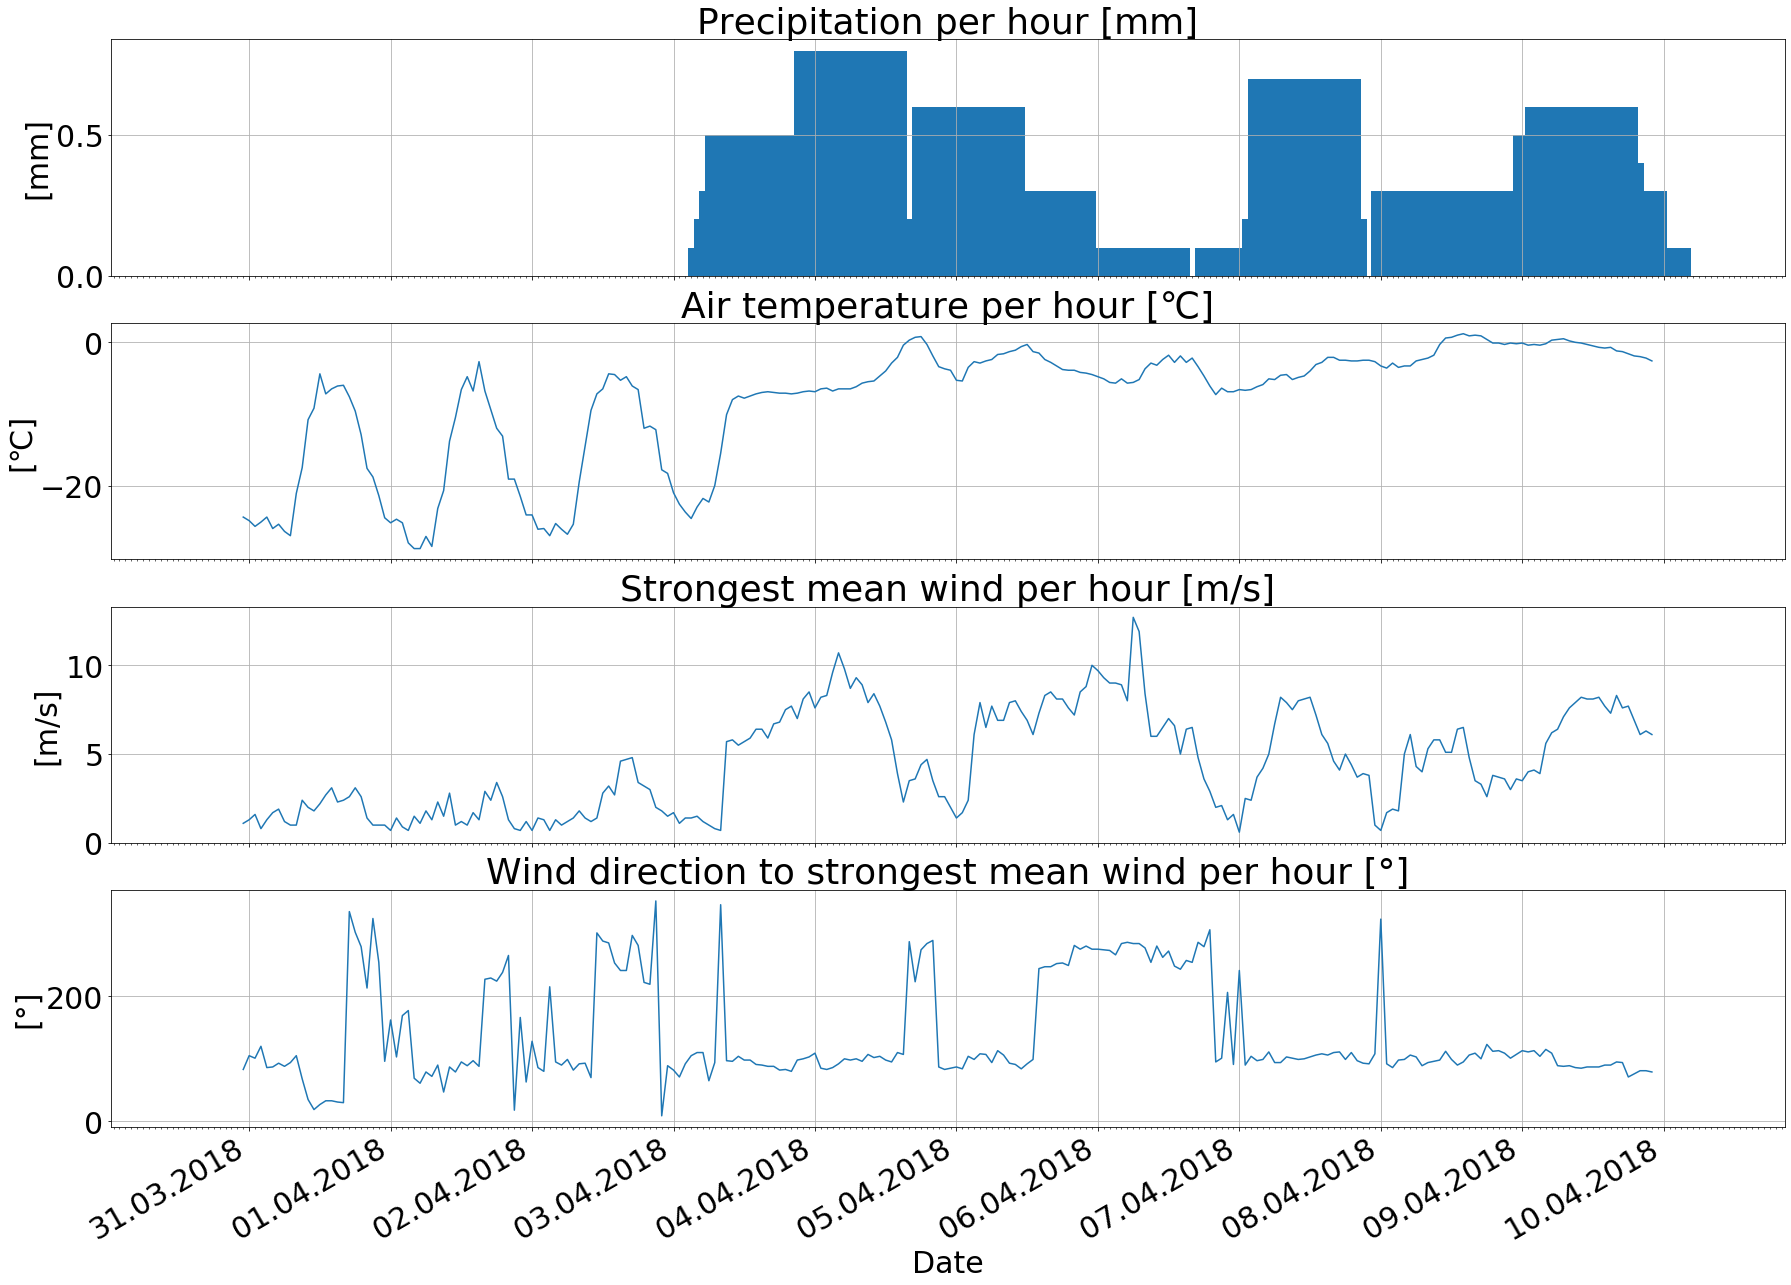

In [45]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30,20), sharex=True)
#fig.subplots_adjust(hspace=0)
#fig.subtitle('subtitle')

# Y-axis with meteorological data
ax1.bar(time2, precipitation)
ax2.plot(time2, temp)
ax3.plot(time2, wind)
ax4.plot(time2, wind_dir)

# Formatting X-axis with small lines per day
ax1.xaxis.set_major_locator(days)
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_minor_locator(hour)
plt.setp(ax4.get_xticklabels(), rotation=30, ha="right")

# Subplot labels
ax1.grid()
ax1.set_title('Precipitation per hour [mm]')
ax1.set_ylabel('[mm]')

ax2.grid()
ax2.set_title('Air temperature per hour [℃]')
ax2.set_ylabel('[℃]')

ax3.grid()
ax3.set_title('Strongest mean wind per hour [m/s]')
ax3.set_ylabel('[m/s]')

ax4.grid()
ax4.set_title('Wind direction to strongest mean wind per hour [°]')
ax4.set_ylabel('[°]')
ax4.set_xlabel('Date')

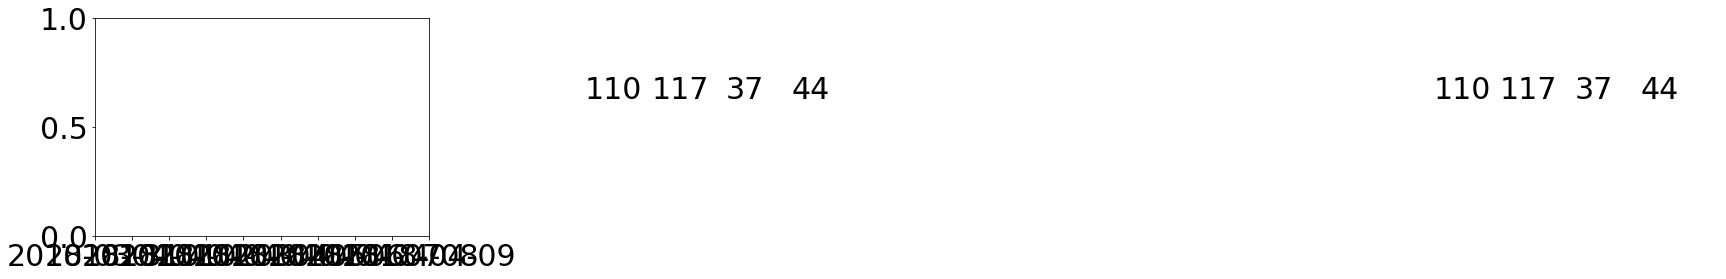

In [46]:
# Lines covering all fours plots at the same date-time.
for ax in [ax1, ax2, ax3, ax4]:
    ax.axvline(x=x1, c=bc, linestyle='--',linewidth=4)
    ax.axvline(x=x2, c=bc, linestyle='--',linewidth=4)
    ax.axvline(x=x3, c=b,linestyle='--',linewidth=4)
    ax.axvline(x=x4, c=bc,linestyle='--',linewidth=4)
    ax.axvline(x=x5, c=r,linestyle='--',linewidth=4)
    ax.axvline(x=x6, c=bc,linestyle='--',linewidth=4)
    ax.axvline(x=x7, c=bc,linestyle='--',linewidth=4)
    ax.axvline(x=x8, c=b,linestyle='--',linewidth=4)
    ax.axvline(x=x9, c=bc,linestyle='--',linewidth=4)
    #ax.axvline(x=x10, c=bc,linestyle='--',linewidth=4)
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

# Labels to lines with relative orbit number
plt.text(x1, 0, '110', transform=trans)
plt.text(x2, 0, '117', transform=trans)
plt.text(x3, 0, '37', transform=trans)
plt.text(x4, 0, '44', transform=trans)
plt.text(x5, 0, '', transform=trans)
plt.text(x6, 0, '110', transform=trans)
plt.text(x7, 0, '117', transform=trans)
plt.text(x8, 0, '37', transform=trans)
plt.text(x9, 0, '44', transform=trans)
#plt.text(x10, 0, '', transform=trans)

# X-axis is date-time.
plt.xlim(start, end)
plt.rcParams.update({'font.size': 30})
plt.show()

fig.savefig(file)

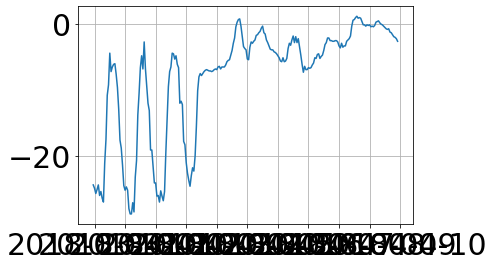

In [33]:
fig, ax = plt.subplots()
ax.plot(time2, temp)
ax.grid()